In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# geopandas
GeoPandas is a Python library that expands pandas by adding support for geospatial data.

In [2]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data\\gbif_sus_scrofa_california\\gbif_sus_scrofa_california\\gbif_sus_scrofa_california.shp'

In [3]:
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
fp = os.path.join('data','ca_state_boundary','ca_state_boundary.shp')
fp

'data\\ca_state_boundary\\ca_state_boundary.shp'

In [5]:
ca_boundary = gpd.read_file(fp)

In [6]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [7]:
# Check the data type of the pigs dataframe
print(type(pigs))

# Check data type of column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'pandas.core.series.Series'>


In [8]:
# Check the data type of each column
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

We can also check the type of each element in the geometry column using the geom_type attribute of a geopandas.GeoDataFrame:bb

In [9]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## CRS
Two other important attributes of a geopandas.GeoDataFrame are its coordinate reference system (CRS) and its extent.

We can think of the coordinate reference system (CRS) as the instructions to locate each spatial feature of our data frame on the surface of the Earth. We access the CRS of a geopandas.GeoDataFrame using the crs attribute:


In [10]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The CRS for our data is the World Geodetic System 1984 (WGS84), represented by the code EPSG:4326. It uses latitude and longitude in degrees to represent places on Earth. This is a very popular CRS, used by Google Earth, GPS systems, and many web-based mapping tools, including Google Maps and OpenStreetMap. We can obtain more information about our CRS by accessing other attributes:

In [11]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)

Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


## Extent
The extent of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.
We access the extent of a geopandas.GeoDataFrame using the total_bounds attribute:

In [12]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

Find the geometry type of the ca_state_boundary

In [13]:
pigs['state'].geometry

AttributeError: 'Series' object has no attribute 'geometry'


## Check-in
Print the CRS and extent of the California state boundary.

In [ ]:
# Examine crs and extent of CA state boundary
print('CRS', ca_boundary.crs, '\n')
print(ca_boundary.total_bounds)

NameError: name 'ca_boundary' is not defined

In [ ]:
pigs.crs == ca_boundary.crs

## Data wrangling
GeoPandas is conveniently built on top of pandas, so we may use everything we have learned about data selection, wrangling, and modification for a pandas.DataFrame to wrange geopandas.GeoDataFrames.

### Example
We only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [ ]:
# Examine number of pig observations by year
pigs['year'].value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [27]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check length of original dataframe
print('Total number of observations: ' , len(pigs))

# Check length of new dataframe
print('Number of observations since 2020: ' , len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


## Create a map
plot()
Similarly to a pandas.DataFrame, a geopandas.GeoDataFrame has a plot() method that we can call directly to create a quick view of our data. The geospatial information of the geopandas.GeoDataFrame will be used to create the axes of the plot.

Example
Let’s take a quick look at our recent pigs data:

<Axes: >

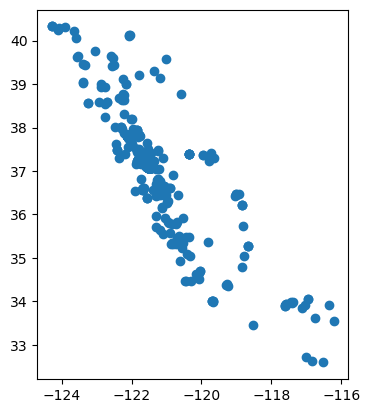

In [ ]:
pigs_recent.plot()

To create a new blank figure:

- Initialize a new figure and axes by calling pyplot’s subplots() function
- Display the figure using plt.show():

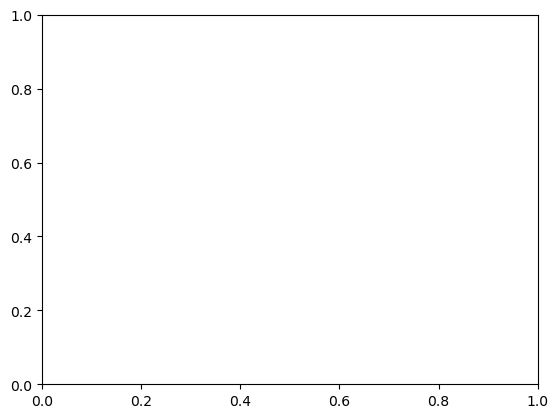

In [ ]:
# Initialize empty figure (fig) and axis (ax)
# Returns two objects (figure and axis)
fig, ax = plt.subplots()

# Display figure
plt.show()

Notice that plt.subplots() is a function that returns two objects, when we call it, we get a figure fig with a single empty axis ax. We can think of this step as setting a new blank canvas on which we will paint upon.

# Adding a layer
When using matplotlib, it can be useful to think of creating a plot as adding layers to an axis. 
The layer we want to add is pigs_recent point data. The general syntax to plot data from a dataframe df onto an axis is:

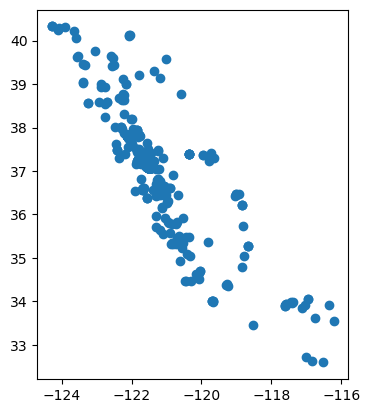

In [16]:
# Initialize empyt figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

Customization
Matplotlib allows for a lot of customization. Some of it can be done directly in the plot() method for the dataframe (like we’ve done when ploting data using pandas), while other is done by updating attributes of the ax axis. The following diagram shows some examples of elements in the axis that can be updated.

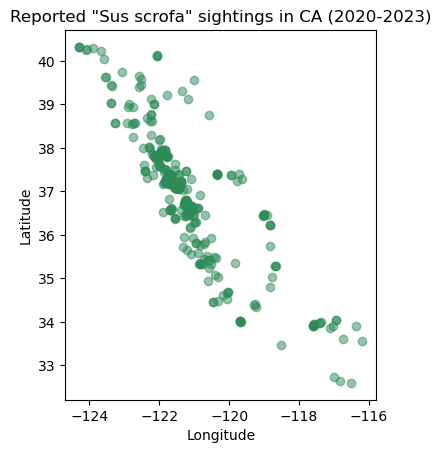

In [18]:
# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='seagreen'  # Update point color
                 )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

# Check-in 1:
1. Add the California state boundary to the plot so the boundary appears behind the points as below. Don’t forget to customize your graph!

2. Write a short caption for your map describing the spatial distribution of observations. What patterns or clusters do you notice?

3. Discuss with a partner: what are some possible biases or limitations in GBIF species occurrence data (e.g., spatial coverage, sampling effort, data quality)?

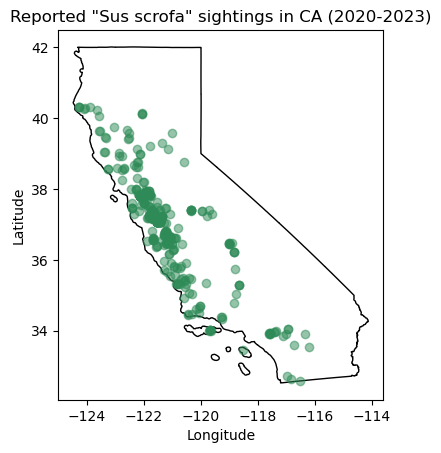

In [30]:
fig, ax = plt.subplots()


#
ca_boundary.plot(ax = ax,
                 color = 'none')

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='seagreen'  # Update point color
                 )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()